In [1]:
import rebound
import os

In [23]:
date = "2020-01-01 12:00"
filename = 'cache.bin'

sim = rebound.Simulation()#.from_file(filename)
sim.add(m=1.)

sim.add(m=3.04043264802e-06, x=-0.30906733255, y=-0.966078279443, z=3.72018216533e-05, vx=0.936270754933, vy=-0.308484956484, vz=7.27604888417e-06)
sim.add(m=0, primary=sim.particles[1], a=0.1, Omega=3, )
# sim.add(m=3.22715603755e-07, x=-0.578048405808, y=-1.3918843324, z=-0.0149811578049, vx=0.781913206607, vy=-0.242153284179, vz=-0.0242646152908)
sim.status()



sim.move_to_com()

---------------------------------
REBOUND version:     	2.13.10
REBOUND built on:    	Apr  2 2016 12:38:43
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, id=0 m=1.0 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.Particle object, id=0 m=3.04043264802e-06 x=-0.30906733255 y=-0.966078279443 z=3.72018216533e-05 vx=0.936270754933 vy=-0.308484956484 vz=7.27604888417e-06>
<rebound.Particle object, id=0 m=0.0 x=-0.212570729701 y=-0.992315764813 z=3.72018216533e-05 vx=0.937717492981 vy=-0.303164122386 vz=7.27604888417e-06>
---------------------------------


In [24]:
sim.status()


---------------------------------
REBOUND version:     	2.13.10
REBOUND built on:    	Apr  2 2016 12:38:43
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.000000
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, id=0 m=1.0 x=9.3969555124e-07 y=2.93728701074e-06 z=-1.13109289219e-10 vx=-2.84665951561e-06 vy=9.3792488142e-07 vz=-2.21222693148e-11>
<rebound.Particle object, id=0 m=3.04043264802e-06 x=-0.309066392854 y=-0.966075342156 z=3.7201708544e-05 vx=0.936267908273 vy=-0.308484018559 vz=7.2760267619e-06>
<rebound.Particle object, id=0 m=0.0 x=-0.212569790005 y=-0.992312827526 z=3.7201708544e-05 vx=0.937714646321 vy=-0.303163184461 vz=7.2760267619e-06>
---------------------------------


In [25]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
%matplotlib inline

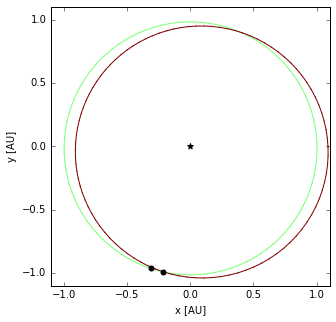

In [26]:
fig = rebound.OrbitPlot(sim, color=True, unitlabel="[AU]")

In [ ]:
ps = sim.particles

def starkForce(reb_sim):
    ps[1].ax -= 0.00001
    ps[1].ay -= 0.00001
    ps[1].az -= 0.00001
    
    
sim.additional_forces = starkForce

In [ ]:

import numpy as np
Nout = 1000
es = np.zeros(Nout)
times = np.linspace(0.,100.*2.*np.pi,Nout)

for i in times:
    print i
    sim.integrate(i)
    fig = rebound.OrbitPlot(sim,color=True,lim=5.0)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)
    
    e = sim.particles[0]
    r = sim.particles[1]
    s = sim.particles[2]
    
#     if (sum([e.vx,e.vy,e.vz]) + sum([s.vx,s.vy,s.vz])) < sum([r.vx,r.vy,r.vz]):
#         print i,'reached'
#         break

In [ ]:
def starkForce(reb_sim): 
    ps[1].ax = 0
    ps[1].ay = 0
    ps[1].az = 0
    
    
sim.additional_forces = starkForce

for i in range(30):
    print i
    sim.integrate(sim.t+i*0.01)
    fig = rebound.OrbitPlot(sim,color=True)
    display(fig)
    plt.close(fig)
    clear_output(wait=True)
    
    

In [ ]:
sim.status() # sim.add(m=, x=,y=,z=,vx,vy,vz)

# sim.add('Mars')
# sim.add('Earth')
# # sim.add(m=0.1e-25, x=-0.33, y=-0.96, z=-0.000125753391114,vx=0.0005 ,vy=-0.0001, vz=0.0001)
# sim.add(m=0.1e-25, x=-0.320858168504, y=-0.958349840955, z=-0.000125753391114, vx=0.1e-20, vy=0.1e-20, vz=0.1e-20)

# sim.add('Venus')
# sim.add('Mercury')
# sim.add('Sun')


# <rebound.Particle object, id=0 m=3.04043264802e-06 x=-0.309066858543 y=-0.96607648127 z=3.72279235517e-05 vx=0.000671075507111 vy=-0.000221107948802 vz=5.10330257704e-09>
# <rebound.Particle object, id=0 m=1e-26 x=-0.320857694497 y=-0.958348042783 z=-0.000125727289216 vx=-4.16653226024e-10 vy=-8.43837026257e-11 vz=-1.11835459231e-10>
# <rebound.Particle object, id=0 m=1.0 x=4.74006646667e-07 y=1.7981724573e-06 z=2.61018984094e-08 vx=-4.16653226025e-10 vy=-8.43837026267e-11 vz=-1.11835459232e-10>
# <rebound.Particle object, id=0 m=1.66011415305e-07 x=0.200253924024 y=-0.388734660017 z=-0.050135739756 vx=0.000807661722459 vy=0.000595200274193 vz=-2.54623540704e-05>
# <rebound.Particle object, id=0 m=2.44783828778e-06 x=0.252872493057 y=0.675222145421 z=-0.00533423200054 vx=-0.000791984573594 vy=0.000291624429835 vz=4.97008378502e-05>
# <rebound.Particle object, id=0 m=3.22715603755e-07 x=-0.578047931801 y=-1.39188253423 z=-0.014981131703 vx=0.000560439097945 vy=-0.000173564449197 vz=-1.73918748861e-05>


# sim.units = ('hr', 'AU', 'msun') # time, length, mass
# bodies = ['Sun','Mercury', 'Venus', 'Earth', 'Mars']
# sim.add(bodies, date=date)   


# 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'
# print sim.G  # the graviational constant
# print sim.dt # timestep (will change for adaptive integrators such as IAS15).
# print sim.t  # current simulation time